# PPO Train and Test experiment

This experiment shows the test rewards retrieved during training for different couples of test and train environments

### Imports and configurations

In [1]:
from PPO.ppo_test import train_and_test_policy

target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

optimized_clip_range = 0.19877024509129543
optimized_learning_rate = 0.0008
optimized_gamma = 0.992

### Run train and test

In [ ]:
print("Start experiments: ")

print('\nsource->source')
train_and_test_policy(
    train_env=source_env,
    test_env=source_env,
    output_folder="./PPO_output/source-source/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000
)

Start experiments: 

source->source
mean episode length
340.50297956867195
mean train reward
1082.5276303262388
mean test reward
1184.1266849646734
test rewards file: ./PPO_output/source-source//test_rewards_CustomHopper-source-v0.txt

target->target


KeyboardInterrupt: 

In [ ]:
print('\ntarget->target')
train_and_test_policy(
    train_env=target_env,
    test_env=target_env,
    output_folder="./PPO_output/target-target/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000
)




target->target


In [ ]:
print('\nsource->target')
train_and_test_policy(
    train_env=source_env,
    test_env=target_env,
    output_folder="./PPO_output/source-target/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000
)

### Plot test rewards for each couple of environments

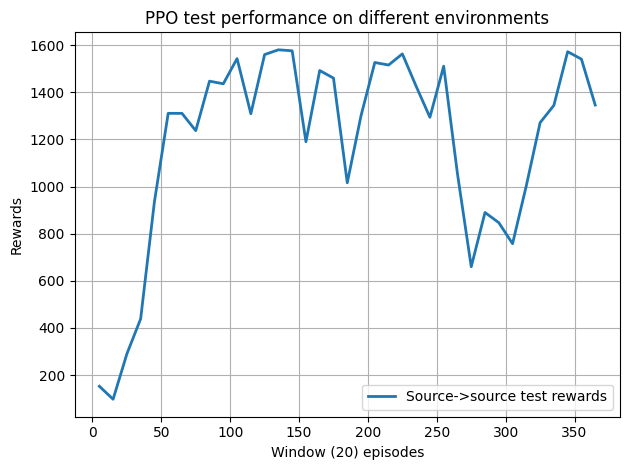

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def get_rewards (filename, window_size: int = 10):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = [float(line.strip()) for line in lines]

        means = []
        positions = []
        for i in range(0, len(data), window_size):
            window = data[i:i+window_size]
            mean_value = np.mean(window)
            means.append(mean_value)
            positions.append(i + window_size//2)
        
        return means, positions
    
path_test_resources = './PPO_output'

#t_t_test_rewards, tt_positions = get_rewards(f'{path_test_resources}/target-target/test_rewards_CustomHopper-target-v0.txt')
#s_t_test_rewards, st_positions = get_rewards(f'{path_test_resources}/source-target/test_rewards_CustomHopper-target-v0.txt')
s_s_test_rewards, ss_positions = get_rewards(f'{path_test_resources}/source-source/test_rewards_CustomHopper-source-v0.txt')

plt.plot(ss_positions, s_s_test_rewards, label=f'Source->source test rewards', linewidth=2)
#plt.plot(st_positions, s_t_test_rewards, label=f'Source->target test rewards', linewidth=2)
#plt.plot(tt_positions, t_t_test_rewards, label=f'Target->target test rewards', linewidth=2)

plt.ylabel("Rewards")
plt.xlabel(f"Window ({20}) episodes")
plt.title("PPO test performance on different environments")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
